<img src="images/pokemon.png" align=right width=60%></img>
# Pokedex Analysis
Author: Jin Yeom (jinyeom@utexas.edu)

## Contents
- [Configuration](#Configuration)
- [Dataset](#Dataset)
- [Cleaning](#Cleaning)
- [Simple EDA](#Simple-EDA)
- [Physical features](#Physical-features)
- [Applications](#Applications)
- [References](#References)

In [109]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
import torch
from torch import nn
from troch import optim
from torch.utils import data
from torch.nn import functional as F

ModuleNotFoundError: No module named 'torch'

In [2]:
%matplotlib inline

In this notebook, we're going to explore the [Pokedex dataset](https://www.kaggle.com/rounakbanik/pokemon). I think Pokedex data is a good starting point for studying data science for following reasons:
- it is relatively clean that you don't have to spend too much time cleaning it
- it is large enough to acquire reliable insights about the dataset, but small enough to be managable
- and lastly, it's Pokemon!

*NOTE: there is a typo in the dataset that I fixed for this notebook (classfication -> classification).*

## Configuration

In [3]:
sns.set()

In [4]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## Dataset

Let's begin by reading the dataset CSV file.

In [5]:
df = pd.read_csv("datasets/pokedex.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [6]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classification,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


It is not a pokedex without all the "photo" data of Pokemons! I can't share the images, but here's a mysterious completely unrelated python script that does absolutely nothing. I wonder what it does...

In [ ]:
from os import walk
from urllib.request import Request, urlopen

req = Request('http://www.cmegroup.com/trading/products/#sortField=oi&sortAsc=false&venues=3&page=1&cleared=1&group=1', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()

f = []
for dirpath, dirnames, filenames in walk("./pokedex_sprites/"):
    f.extend(filenames)
    break

for pk_name in [s.split(".")[0] for s in f]:
    addr = f"https://img.pokemondb.net/artwork/{pk_name}.jpg"
    print(f"\x1b[31m{addr}\x1b[0m")
    print(f"Downloading {pk_name}...")
    req = Request(addr, headers={"User-Agent": "Mozilla/5.0"})
    img = urlopen(req).read()

    with open(f"{pk_name}.jpg", "wb") as f:
        f.write(img)

## Cleaning

In [7]:
# show columns with missing values and their counts
def print_null(df):
    missing_vals = dict((c, df[c].isnull().sum()) for c in df.columns[df.isnull().any()])
    for k, v in missing_vals.items():
        print(f"{k}: {v}")

In [8]:
print_null(df)

height_m: 20
percentage_male: 98
type2: 384
weight_kg: 20


In [9]:
df["height_m"].fillna(np.int(0), inplace=True)
df["percentage_male"].fillna(np.int(-1), inplace=True)
df["type2"].fillna("none", inplace=True)
df["weight_kg"].fillna(np.int(0), inplace=True)
print_null(df) # should print nothing

It seems like `is_legendary` columns is typed `int64` (0 and 1). We wouldn't want that now, would we.

In [10]:
df["is_legendary"].sample(5)

378    1
542    0
477    0
134    0
209    0
Name: is_legendary, dtype: int64

In [11]:
df["is_legendary"] = df["is_legendary"].astype("bool")
df["is_legendary"].sample(5)

368    False
94     False
760    False
522    False
663    False
Name: is_legendary, dtype: bool

`dtype` for `capture_rate` also seems strange (`object` instead of `int64`).

In [12]:
print("capture_rate (before):", df["capture_rate"].unique())

capture_rate (before): ['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']


In [13]:
print(df["name"][df["capture_rate"] == "30 (Meteorite)255 (Core)"])
df["capture_rate"].replace("30 (Meteorite)255 (Core)", "30", inplace=True)
df["capture_rate"] = pd.to_numeric(df["capture_rate"])
df["capture_rate"].sample(5)

773    Minior
Name: name, dtype: object


352    225
80     190
694     75
612    120
504    255
Name: capture_rate, dtype: int64

In [14]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,98.675406,73.008739,1.054996e+06,1.134831,68.958801,48.285268,401.000000,71.305868,70.911361,66.334582,59.845568,3.690387
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,76.248866,30.769159,1.602558e+05,1.082103,26.576015,26.443910,231.373075,32.353826,27.942501,28.907662,108.403567,1.930420
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,3.000000,5.000000,6.000000e+05,0.000000,1.000000,-1.000000,1.000000,10.000000,20.000000,5.000000,0.000000,1.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,45.000000,50.000000,1.000000e+06,0.500000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,8.300000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,60.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,25.500000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,170.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,61.500000,5.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,255.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000


## Simple EDA

Let's start off with something simple.

### Generational count

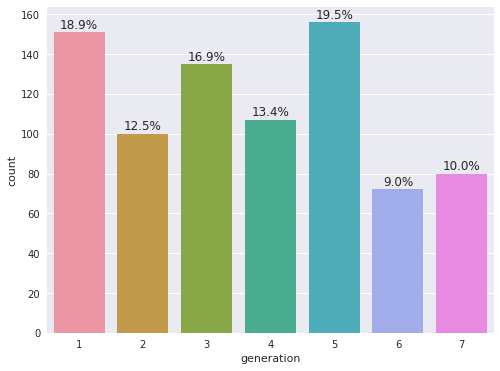

In [18]:
# let's look at how many Pokemons are introduced in each generation
plt.figure(figsize=(8, 6))
ax = sns.countplot(df["generation"])
for p in ax.patches:
    # print percentage above each bar
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0,
            height + 2,
            '{:.1f}%'.format(height * 100 / len(df)),
            ha="center")
plt.show()

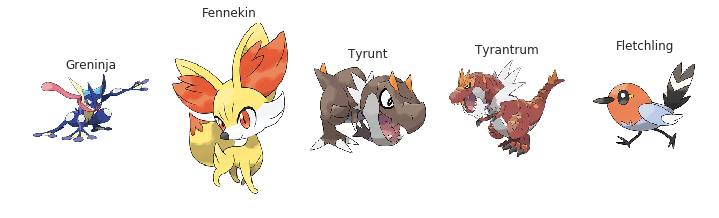

In [83]:
# Generation 6 seems to have significantly small number of new Pokemons
names = df[df["generation"] == 6]["name"].sample(5)
fig, axes = plt.subplots(1, 5, figsize=(12, 48))
for name, ax in zip(names, axes):
    ax.set_title(name)
    ax.axis("off")
    ax.imshow(mpimg.imread(f"datasets/pokedex_artworks/{name.lower()}.jpg"))

### Legendary Pokemons

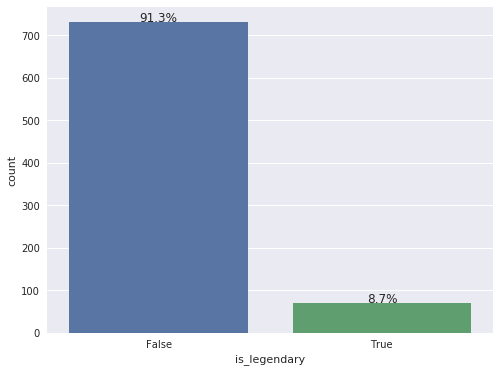

In [95]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(df["is_legendary"])
for p in ax.patches:
    # print percentage above each bar
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0,
            height + 2,
            '{:.1f}%'.format(height * 100 / len(df)),
            ha="center")
plt.show()

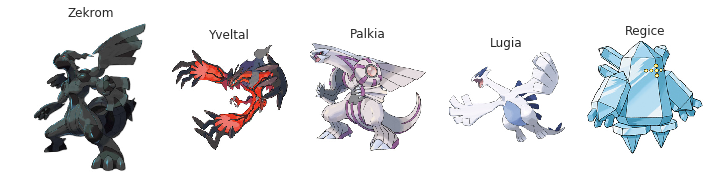

In [107]:
names = df[df["is_legendary"]]["name"].sample(5)
fig, axes = plt.subplots(1, 5, figsize=(12, 48))
for name, ax in zip(names, axes):
    ax.set_title(name)
    ax.axis("off")
    ax.imshow(mpimg.imread(f"datasets/pokedex_artworks/{name.lower()}.jpg"))

### Finding correlations

In [17]:
coi = ["attack", "defense", "capture_rate", "experience_growth",
       "height_m", "hp", "sp_attack", "sp_defense", "speed", "weight_kg"]
coi.extend([c for c in df.columns if c.startswith("against")])
df[coi].describe()

,attack,defense,capture_rate,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
count,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,77.857678,73.008739,98.675406,1.054996e+06,1.134831,68.958801,71.305868,70.911361,66.334582,59.845568,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365
std,32.158820,30.769159,76.248866,1.602558e+05,1.082103,26.576015,32.353826,27.942501,28.907662,108.403567,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562
min,5.000000,5.000000,3.000000,6.000000e+05,0.000000,1.000000,10.000000,20.000000,5.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,55.000000,50.000000,45.000000,1.000000e+06,0.500000,50.000000,45.000000,50.000000,45.000000,8.300000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000
50%,75.000000,70.000000,60.000000,1.000000e+06,1.000000,65.000000,65.000000,66.000000,65.000000,25.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,100.000000,90.000000,170.000000,1.059860e+06,1.500000,80.000000,91.000000,90.000000,85.000000,61.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,185.000000,230.000000,255.000000,1.640000e+06,14.500000,255.000000,194.000000,230.000000,180.000000,999.900000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000


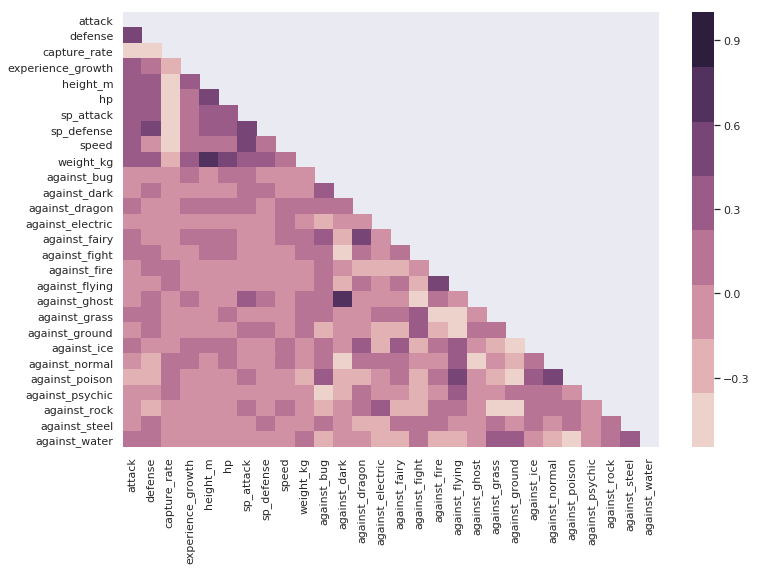

In [18]:
plt.figure(figsize=(12, 8))
# correlation matrix
corr = df[coi].corr()
# mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# color palette
cmap = sns.cubehelix_palette(8)
sns.heatmap(corr, mask=mask, cmap=cmap)

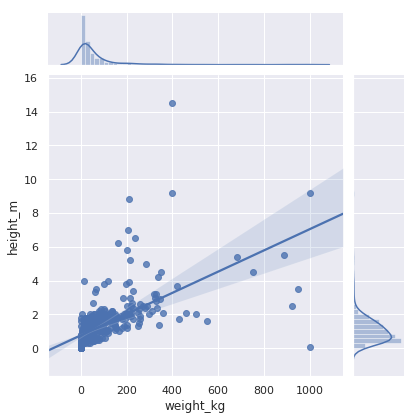

In [19]:
sns.jointplot(x="weight_kg", y="height_m", data=df, kind="reg")

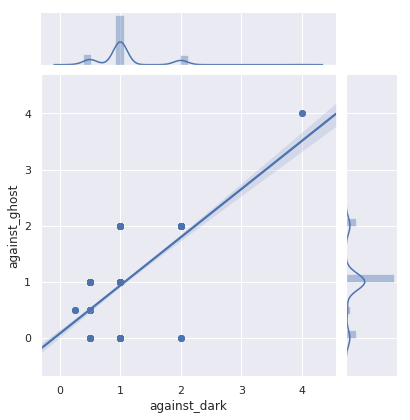

In [20]:
sns.jointplot(x="against_dark", y="against_ghost", data=df, kind="reg")

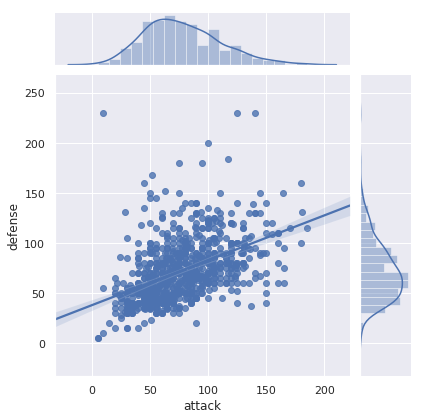

In [21]:
sns.jointplot(x="attack", y="defense", data=df, kind="reg")

## Physical features

Here, let's try something a little different. Rather than looking at the numbers, we're going to study "physical features" of Pokemons. By building a generative model of their sprite images, we can not only learn the distribution of the images, we can also study the correlation between these images and their statistics.

In [110]:
class PokemonSpriteDataset(data.Dataset):
    def __init__(self, root, transfer, train=True):
        self.transform = transform
        self._images = sorted(glob(f"{root}/{mode}/*.png"))
        
    def __len__(self):
        return len(self._images)
    
    def __getitem__(self, index):
        img = Image.open(self._images[index])
        pix = np.array(img)
        alpha = pix[:, :, 3] # alpha channel
        pix[alpha == 0.0] = 255 # whiten the transparent parts
        img = Image.fromarray(pix[:, :, :3], "RGB")
        return self.transform(img)

NameError: name 'data' is not defined

In [ ]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, )

## Applications

### Capturing simulation

### Battle simulation

### Evolving an optimal team

## References

1. https://www.kaggle.com/jeru666/my-pokemon-collection/code
2. https://www.kaggle.com/romaintt/pokemon-create-new-legendary-pokemon/code